In [1]:
import preprocessing as pp
import pandas as pd
import numpy as np
import time 
import deter_mod as dm
# import xpress as xp # FICO Xprerss Solver
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from k_means_constrained import KMeansConstrained
# xp.init('/Applications/FICO Xpress/xpressmp/bin/xpauth.xpr')

In [2]:
# Read and Preprocess the data
(cus_df, cand_df, sup_df, vehicle_df, distance_w_to_s_df, distance_w_to_c_df, demand_cus_period_df,
    demand_cus_period_scene_df) = pp.read_and_prep_data()

time_limit_s = 3600
time_obj_gap_dict = {}

############ Change you clusters list here ############
n_clusters_list = [70,80,90,200,250,300]
# n_clusters_list = [50]
for each_n_clusters in n_clusters_list:

    print(f'Now running Case N_cluster = {each_n_clusters}')
    # Customer Clustering
    cus_df, clust_center_df = pp.const_cluster_by_cus_loc(cus_df, n_clusters=each_n_clusters,
                                                            size_min=1, size_max=20, random_state=42)

    agg_dem_cus_period_df = pp.agg_dem_cus_period(demand_cus_period_df, cus_df)
    distance_w_to_cluster_df = pp.create_dis_mat_df(cand_df, clust_center_df, 'cityblock')

    # Create Cost
    tra_cost_w_to_cluster = pp.calculate_cost_from_w_to_cluster(distance_w_to_cluster_df, vehicle_df)
    tra_cost_w_to_s = pp.calculate_cost_from_w_to_s(distance_w_to_s_df, vehicle_df, sup_df)

    solve_time, objective_value, mip_gap_percentage, x, y, o, v, z = dm.deter_model(agg_dem_cus_period_df, 
                                                                                    cand_df, 
                                                                                    sup_df, 
                                                                                    clust_center_df, 
                                                                                    tra_cost_w_to_s, 
                                                                                    tra_cost_w_to_cluster,
                                                                                    time_limit_s)
    time_obj_gap_dict[each_n_clusters] = [solve_time, objective_value, mip_gap_percentage]

Now running Case N_cluster = 70
FICO Xpress v9.4.0, Hyper, solve started 1:51:03, Feb 14, 2025
Heap usage: 1106MB (peak 1106MB, 294MB system)
Minimizing MILP MEWLP_Deterministic using up to 8 threads and up to 8192MB memory, with these control settings:
MAXTIME = 3600
OUTPUTLOG = 1
MIPRELSTOP = .001
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = 1
Original problem has:
   1571590 rows      1778040 cols      6339520 elements    312840 entities
Presolved problem has:
    332142 rows       542552 cols      2917983 elements    309352 entities
LP relaxation tightened
Presolve finished in 20 seconds
Heap usage: 1520MB (peak 2529MB, 294MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  8.00e+06] / [ 2.81e-03,  1.32e+02]
  RHS and bounds [min,max] : [ 1.00e+00,  1.53e+07] / [ 1.00e+00,  1.87e+03]
  Objective      [min,max] : [ 2.45e-04,  6.25e+06] / [ 1.25e-01,  6.88e+06]
Autoscaling applied Curtis-Reid 

In [3]:
time_obj_gap_dict

{70: [721.9468851089478, 39879762.49947886, 0.09382746210932703],
 80: [1884.0238270759583, 39820718.381374754, 0.0959813424471162],
 90: [2347.3955619335175, 39666989.26035454, 0.07968793393852262],
 200: [1558.725037097931, 39657642.69431275, 0.08555714810622597],
 250: [1991.1633620262146, 39446926.35631143, 0.08712607852969763],
 300: [3601.30167388916, 39586648.03941831, 0.5664620371619634]}

{50: [785.012540102005, 39837821.06077693, 0.09450871083440426],
 100: [892.4625458717346, 39609936.8437896, 0.0848536987045584],
 150: [2851.203066110611, 39572001.387027375, 0.06990481225311167],
 60: [3601.248497247696, 39917296.8264962, 0.5896630874545216]
 70: [721.9468851089478, 39879762.49947886, 0.09382746210932703],
 80: [1884.0238270759583, 39820718.381374754, 0.0959813424471162],
 90: [2347.3955619335175, 39666989.26035454, 0.07968793393852262],
 200: [1558.725037097931, 39657642.69431275, 0.08555714810622597],
 250: [1991.1633620262146, 39446926.35631143, 0.08712607852969763],
 300: [3601.30167388916, 39586648.03941831, 0.5664620371619634]}

60:
Solving Time: 3601.248497247696
Objective Value: 39917296.8264962
% GAP: 0.5896630874545216

# Read and Preprocess the data
(cus_df, cand_df, sup_df, vehicle_df, distance_w_to_s_df, distance_w_to_c_df, demand_cus_period_df,
    demand_cus_period_scene_df) = pp.read_and_prep_data()

time_limit_s = 3600
# time_obj_gap_dict = {}

############ Change you clusters list here ############
n_clusters_list = [100, 150]
# n_clusters_list = [50]
for each_n_clusters in n_clusters_list:

    print(f'Now running Case N_cluster = {each_n_clusters}')
    # Customer Clustering
    cus_df, clust_center_df = pp.const_cluster_by_cus_loc(cus_df, n_clusters=each_n_clusters,
                                                            size_min=1, size_max=20, random_state=42)

    agg_dem_cus_period_df = pp.agg_dem_cus_period(demand_cus_period_df, cus_df)
    distance_w_to_cluster_df = pp.create_dis_mat_df(cand_df, clust_center_df, 'cityblock')

    # Create Cost
    tra_cost_w_to_cluster = pp.calculate_cost_from_w_to_cluster(distance_w_to_cluster_df, vehicle_df)
    tra_cost_w_to_s = pp.calculate_cost_from_w_to_s(distance_w_to_s_df, vehicle_df, sup_df)

    solve_time, objective_value, mip_gap_percentage, x, y, o, v, z = dm.deter_model(agg_dem_cus_period_df, 
                                                                                    cand_df, 
                                                                                    sup_df, 
                                                                                    clust_center_df, 
                                                                                    tra_cost_w_to_s, 
                                                                                    tra_cost_w_to_cluster,
                                                                                    time_limit_s)
    time_obj_gap_dict[each_n_clusters] = [solve_time, objective_value, mip_gap_percentage]

# Appendix

In [4]:
customer_df, candidate_df, supplier_df, vehicle_df, distance_w_to_s_df, distance_w_to_c_df, demand_cus_period_df, demand_cus_period_scene_df = pp.read_and_prep_data()

# 2 methods for clustering

customer_df, cluster_center_df = pp.ori_cluster_by_cus_loc(customer_df, n_clusters=400, random_state=42, n_init=10)
# customer_df, cluster_center_df = pp.const_cluster_by_cus_loc(customer_df, n_clusters=100, size_min=4, size_max=400, random_state=42)

agg_dem_cus_period_df = pp.agg_dem_cus_period(demand_cus_period_df,customer_df)

agg_dem_cus_period_scene_df = pp.agg_dem_cus_period_scene(demand_cus_period_scene_df, customer_df)

In [5]:
agg_dem_cus_period_df

0        1        2        3        4        5  \
Cluster ProductIndex                                                        
0       0               13.0     27.0     39.0     46.0     68.0     75.0   
        1               16.0     33.0     49.0     80.0     96.0    100.0   
        2              111.0    174.0    315.0    402.0    500.0    627.0   
        3               12.0     31.0     36.0     50.0     70.0     77.0   
1       0              314.0    543.0    855.0    971.0   1436.0   1703.0   
...                      ...      ...      ...      ...      ...      ...   
398     3               82.0    206.0    230.0    389.0    455.0    577.0   
399     0             1697.0   3952.0   5649.0   6812.0   7583.0   9312.0   
        1             1377.0   2590.0   4818.0   6828.0   8098.0   8411.0   
        2             7640.0  14654.0  19938.0  28589.0  41972.0  47586.0   
        3              593.0   1294.0   2241.0   2448.0   3651.0   4227.0   

                            6        7        8        9  
Cluster ProductIndex                                      
0       0                94.0    102.0    116.0    126.0  
        1               135.0    145.0    163.0    179.0  
        2               778.0    855.0    953.0   1055.0  
        3                89.0    104.0    124.0    137.0  
1       0              1935.0   2387.0   2551.0   2816.0  
...                       ...      ...      ...      ...  
398     3               580.0    694.0    824.0    883.0  
399     0             11303.0  13681.0  15112.0  16957.0  
        1              9696.0  12116.0  13859.0  15053.0  
        2             51140.0  62184.0  71695.0  78937.0  
        3              4389.0   5415.0   6317.0   6762.0  

[1600 rows x 10 columns]

In [6]:
agg_dem=agg_dem_cus_period_scene_df.reset_index()

In [7]:
agg_dem = agg_dem.drop(columns=['Cluster', 'ProductIndex', 'PeriodIndex'])

In [8]:
agg_dem_T=agg_dem.T

In [9]:
agg_dem_T

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,12.0,35.0,48.0,71.0,103.0,108.0,147.0,191.0,155.0,208.0,...,524.0,1262.0,3096.0,3165.0,5685.0,5437.0,7863.0,8854.0,10714.0,12368.0
1,12.0,30.0,35.0,47.0,70.0,79.0,105.0,82.0,90.0,133.0,...,628.0,1316.0,2076.0,2736.0,2866.0,4535.0,4808.0,4837.0,5654.0,5954.0
2,11.0,21.0,34.0,40.0,62.0,74.0,77.0,80.0,104.0,81.0,...,588.0,1468.0,1789.0,1893.0,2701.0,2963.0,3167.0,4896.0,4629.0,5093.0
3,13.0,27.0,49.0,48.0,87.0,79.0,129.0,144.0,160.0,177.0,...,683.0,1306.0,2716.0,2801.0,5031.0,5552.0,5626.0,8392.0,7057.0,8114.0
4,13.0,33.0,39.0,55.0,81.0,89.0,88.0,126.0,146.0,157.0,...,530.0,1220.0,2226.0,2201.0,4108.0,4139.0,5866.0,6962.0,6113.0,8460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.0,23.0,26.0,24.0,34.0,36.0,36.0,30.0,18.0,9.0,...,554.0,1011.0,1574.0,1437.0,1888.0,1540.0,1544.0,1204.0,1162.0,433.0
96,12.0,28.0,54.0,52.0,101.0,98.0,118.0,155.0,227.0,248.0,...,645.0,1420.0,2628.0,3436.0,5318.0,6388.0,5990.0,7674.0,9570.0,11996.0
97,13.0,25.0,48.0,55.0,66.0,83.0,116.0,105.0,128.0,124.0,...,584.0,1428.0,2655.0,2469.0,3732.0,3852.0,4274.0,5609.0,6254.0,8108.0
98,13.0,22.0,37.0,42.0,61.0,60.0,67.0,81.0,91.0,86.0,...,648.0,1041.0,1774.0,2235.0,2861.0,3432.0,3966.0,3299.0,4776.0,4773.0


In [10]:
from k_means_constrained import KMeansConstrained
import numpy as np
import pandas as pd

def constrained_kmeans_clustering(data, n_clusters=5, size_min=None, size_max=None, random_state=42):

    num_samples = data.shape[0]  # Total number of data points

    # Ensure size_min and size_max are valid
    if size_min is None:
        size_min = 1
    if size_max is None:
        size_max = num_samples // n_clusters  # Set to an approximate even distribution

    # Ensure valid size constraints
    size_min = max(1, min(size_min, num_samples - n_clusters + 1))
    size_max = min(size_max, num_samples)

    # Train K-Means Constrained
    kmeans_constrained = KMeansConstrained(
        n_clusters=n_clusters,
        size_min=size_min,
        size_max=size_max,
        random_state=random_state
    )
    a=kmeans_constrained.fit(data)
    cluster_center_df = pd.DataFrame(kmeans_constrained.cluster_centers_)
    labels = kmeans_constrained.fit_predict(data)  # Get cluster labels

    return labels, cluster_center_df  # ✅ Now returning both labels and model


In [11]:
df,cluster_center_df=constrained_kmeans_clustering(agg_dem_T, n_clusters=5, size_min=5, size_max=20, random_state=42)

In [12]:
cluster_center_df

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,13.50,30.70,46.95,58.25,92.5,105.1,138.05,158.90,182.45,210.30,...,611.90,1376.60,2739.65,3169.15,4829.15,6012.90,6305.85,8637.20,10183.00,11206.40
1,12.50,26.40,37.30,43.10,62.2,63.7,82.25,91.15,96.05,106.85,...,583.25,1235.15,2103.45,2290.15,3285.30,3897.85,4069.65,4713.50,5354.95,5427.70
2,12.70,23.75,32.85,35.70,47.9,47.6,53.05,52.05,49.55,50.15,...,574.15,1157.55,1824.20,1824.70,2603.05,2590.00,2542.30,2856.70,2882.20,2733.05
3,13.55,29.30,41.95,50.25,72.8,79.6,99.25,115.20,129.05,149.65,...,591.55,1361.25,2403.15,2639.05,3927.60,4532.60,4877.50,5962.75,7251.90,7688.80
4,13.00,26.45,37.30,44.45,65.1,72.0,87.15,97.95,116.95,113.10,...,594.10,1293.55,2192.35,2327.45,3678.75,4152.10,4369.60,5050.75,5732.25,5997.30


In [13]:
test2 = cluster_center_df.T

In [14]:
test2.index=agg_dem_cus_period_scene_df.index

In [15]:
test2

0        1        2        3        4
Cluster ProductIndex PeriodIndex                                              
0       0            0               13.50    12.50    12.70    13.55    13.00
                     1               30.70    26.40    23.75    29.30    26.45
                     2               46.95    37.30    32.85    41.95    37.30
                     3               58.25    43.10    35.70    50.25    44.45
                     4               92.50    62.20    47.90    72.80    65.10
...                                    ...      ...      ...      ...      ...
399     3            5             6012.90  3897.85  2590.00  4532.60  4152.10
                     6             6305.85  4069.65  2542.30  4877.50  4369.60
                     7             8637.20  4713.50  2856.70  5962.75  5050.75
                     8            10183.00  5354.95  2882.20  7251.90  5732.25
                     9            11206.40  5427.70  2733.05  7688.80  5997.30

[16000 rows x 5 columns]

In [16]:
import matplotlib.pyplot as plt

/Users/arin/miniconda3/envs/Xpress/lib/python3.12/site-packages/k_means_constrained/k_means_constrained_.py:464: RuntimeWarning: invalid value encountered in cast
  costs = np.around(costs * 1000, 0).astype('int32')  # Times by 1000 to give extra precision


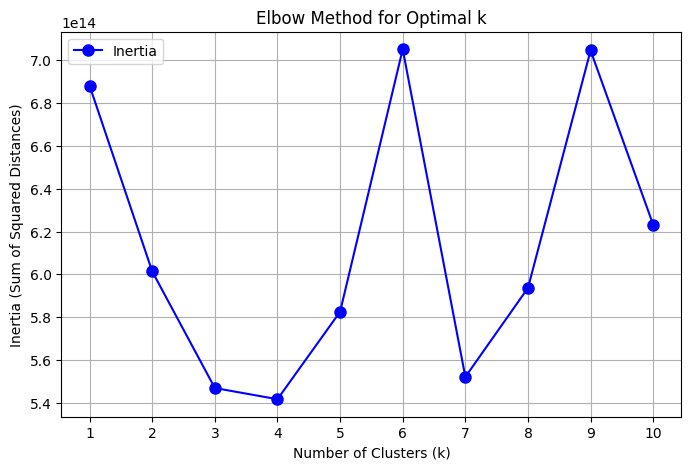

In [17]:
data = agg_dem_T.values  # Convert to numpy array if needed

# Define range of clusters to test
k_values = range(1, 11)  # Try k from 1 to 10
inertia_values = []  # Store inertia values

# Loop over different values of k
for k in k_values:
    model = KMeansConstrained(n_clusters=k, size_min=1, size_max=100, random_state=42)
    model.fit(data)  # Train the model
    inertia_values.append(model.inertia_)  # Store inertia

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-', markersize=8, label="Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [18]:
test=agg_dem_cus_period_scene_df.T

In [19]:
cluster_center_df = pd.DataFrame(cluster_center)

NameError: name 'cluster_center' is not defined

In [ ]:
test2 = cluster_center_df.T

In [ ]:
test2.index = test.T.index

In [ ]:
test.T.index

MultiIndex([(  0, 0, 0),
            (  0, 0, 1),
            (  0, 0, 2),
            (  0, 0, 3),
            (  0, 0, 4),
            (  0, 0, 5),
            (  0, 0, 6),
            (  0, 0, 7),
            (  0, 0, 8),
            (  0, 0, 9),
            ...
            (399, 3, 0),
            (399, 3, 1),
            (399, 3, 2),
            (399, 3, 3),
            (399, 3, 4),
            (399, 3, 5),
            (399, 3, 6),
            (399, 3, 7),
            (399, 3, 8),
            (399, 3, 9)],
           names=['Cluster', 'ProductIndex', 'PeriodIndex'], length=16000)

In [ ]:
test2

0         1        2        3        4
Cluster ProductIndex PeriodIndex                                              
0       0            0              12.85     13.70    14.20    12.05    12.45
                     1              28.05     31.65    29.40    24.30    23.20
                     2              39.65     48.75    42.90    34.65    30.40
                     3              47.60     60.40    53.45    39.30    31.00
                     4              70.40     94.95    78.05    54.70    42.40
...                                   ...       ...      ...      ...      ...
399     3            5            4253.05   6245.85  5181.95  3313.50  2191.10
                     6            4454.70   6624.05  5714.10  3466.80  1905.25
                     7            5330.00   9051.10  6947.10  3894.20  1998.50
                     8            6471.35  10791.45  8271.15  4217.80  1652.55
                     9            6753.35  11939.90  9010.10  4040.55  1309.35

[16000 rows x 5 columns]